<b>LendingClub-RandomForest</b>

Lending club facilitates peer to peer lending. Lending Club sold 22million usd to Jefferies Investments that didn't meet the investment criteria; thus they were lending money to people that couldn't pay back.

This project will train a random forest model to predict whether a customer will default on their loan using the features of a dataset containing lendingClubs 2007-2010 customer data.

Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

In [1]:
#Imports 

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')

In [5]:
#load the dataset
loans=pd.read_csv('loan_data.csv')

In [6]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [7]:
#Check for descriptive statistics
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


# Exploratory Data Analaysis

* Create histogram of two FICO distributions, one for each credit.policy outcome

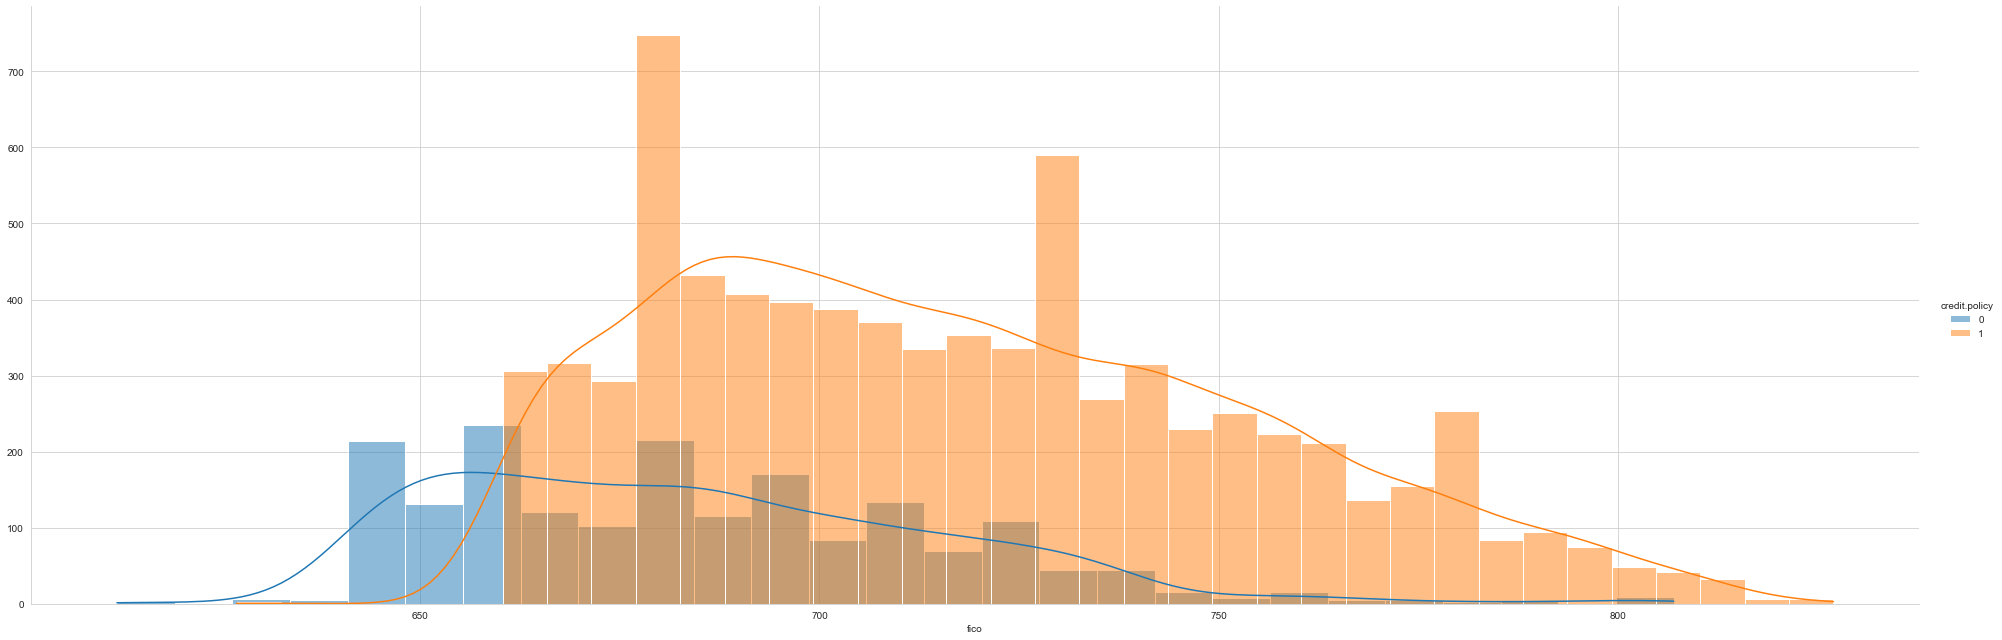

In [25]:
Boi = sns.FacetGrid(loans, hue="credit.policy",height=9,aspect=3)
Boi = Boi.map(sns.histplot, "fico",kde=True)
Boi.add_legend()

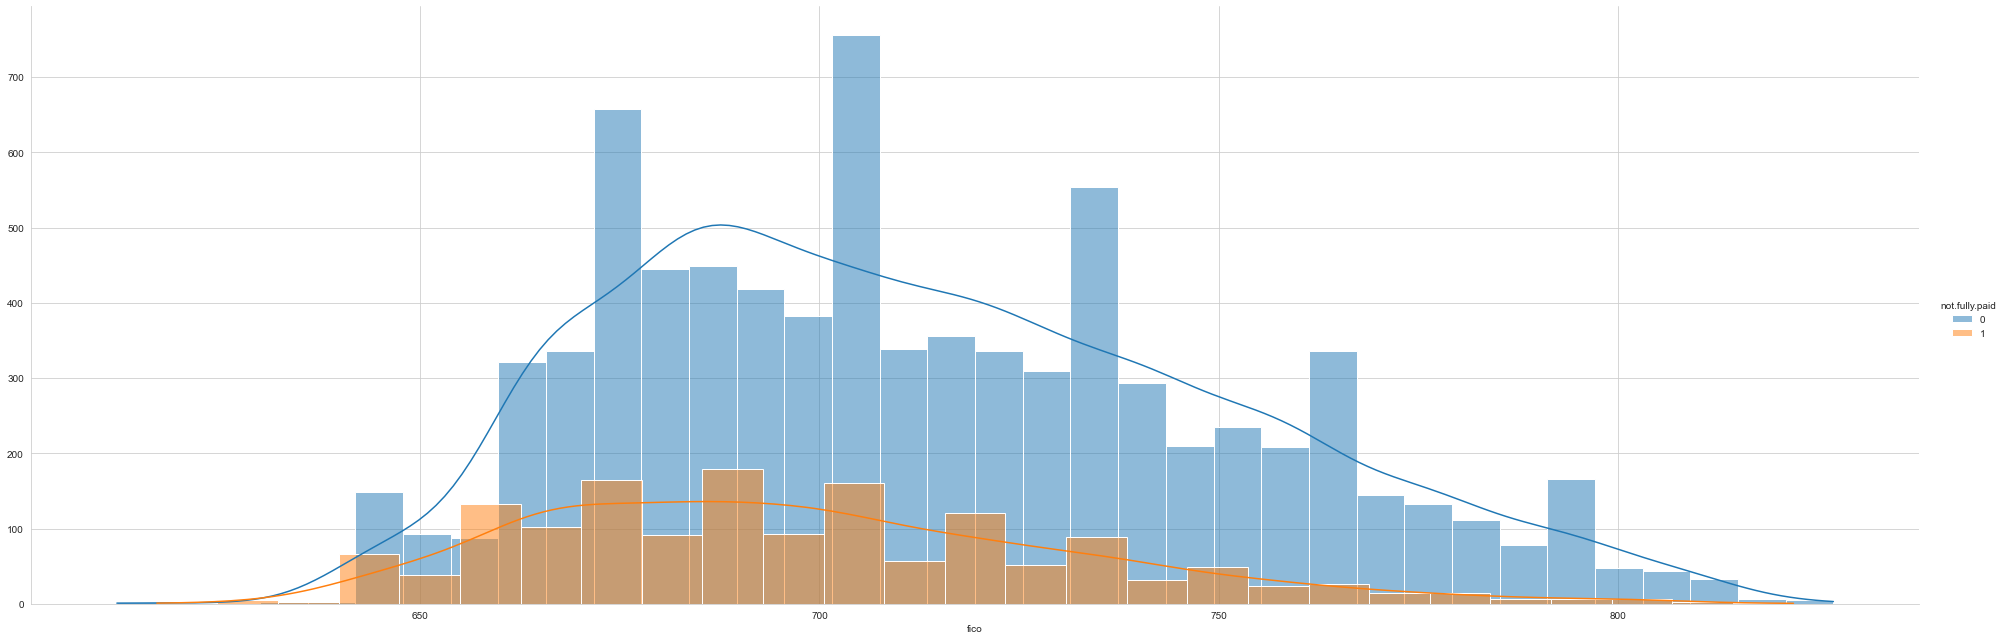

In [24]:
# Make a plot between defaulters and fico scores
nfp = sns.FacetGrid(loans, hue="not.fully.paid",height=9,aspect=3)
nfp= nfp.map(sns.histplot, "fico",kde=True)
nfp.add_legend()

<AxesSubplot:xlabel='purpose', ylabel='count'>

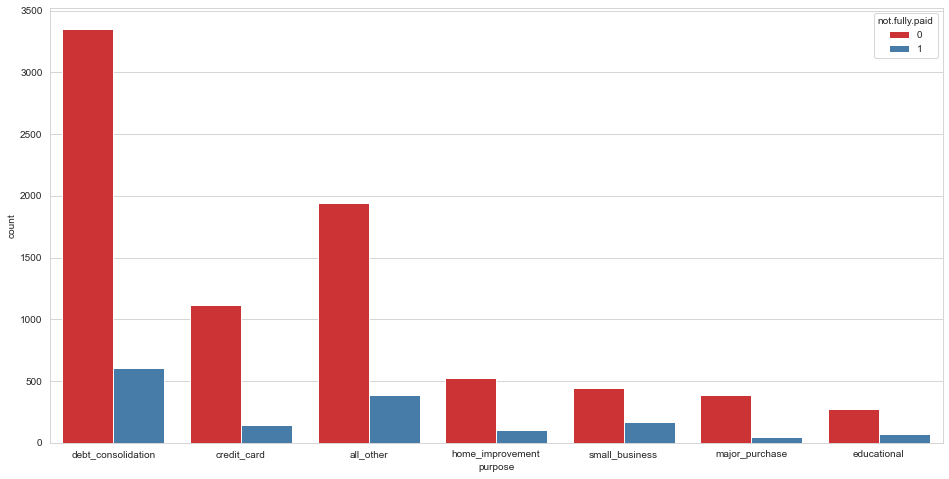

In [26]:
#Countplot to see the allocation of loans by purpose, color it by defaulted loans
plt.figure(figsize=(16,8))
sns.countplot(x='purpose',hue='not.fully.paid',data=loans,palette='Set1')

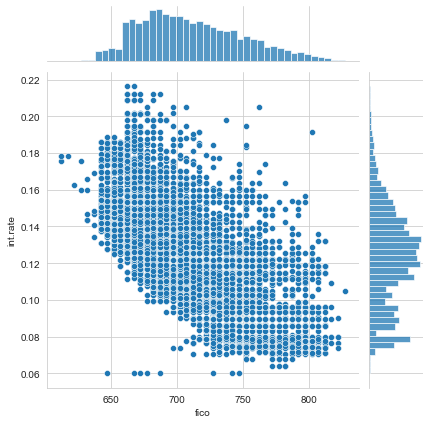

In [27]:
# Check for a trend between FICO and int rate
sns.jointplot(x='fico',y='int.rate',data=loans)

* We see an inverse relationship between the variables. As fico goes up interest rates go down which is exactly what we expect

<Figure size 1152x576 with 0 Axes>

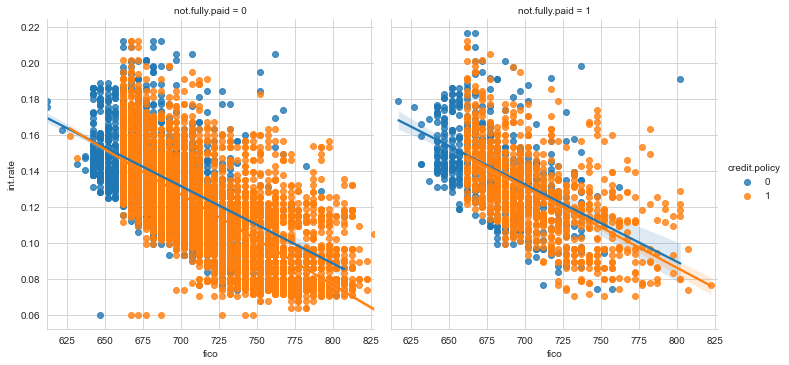

In [28]:
# Will trend differ between defaulters and those who don't meet lending criteria
plt.figure(figsize=(16,8))
sns.lmplot(data=loans,x='fico',y='int.rate',hue='credit.policy',
           col='not.fully.paid')

# Set up the data for Random forest model, run tree classifier to compare

In [29]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [30]:
# Need to deal with categorical features by transforming to dummy vars (like purpose)

cat_feats=['purpose']
final_data=pd.get_dummies(loans,columns=cat_feats,drop_first=True)

In [31]:
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [32]:
#Train test split
from sklearn.model_selection import train_test_split
X=final_data.drop('not.fully.paid',axis=1)
y=final_data['not.fully.paid']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [34]:
#Train and fit

from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [35]:
#Predict and evaluate

prediccion=dtree.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix

In [36]:
print(classification_report(y_test,prediccion))
print('\n')
print(confusion_matrix(y_test,prediccion))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84      2414
           1       0.21      0.22      0.21       460

    accuracy                           0.74      2874
   macro avg       0.53      0.53      0.53      2874
weighted avg       0.75      0.74      0.74      2874



[[2023  391]
 [ 358  102]]


* 380 false positives, 358 false negatives
* 2023 true positives, 102 true negatives

In [37]:
#Create random forest and train
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=600)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=600)

In [38]:
rfc_pred = rfc.predict(X_test)

In [39]:
print(classification_report(y_test,rfc_pred))
print('\n')
print(confusion_matrix(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2414
           1       0.56      0.02      0.04       460

    accuracy                           0.84      2874
   macro avg       0.70      0.51      0.48      2874
weighted avg       0.80      0.84      0.77      2874



[[2407    7]
 [ 451    9]]


* In this case, using a random forest model didn't help much, giving us a lot more false negatives, the tree classifier performed better